# 2. Connectionist Bench (Sonar, Mines vs. Rocks) (1.5 điểm)

Cho dữ liệu sonar.all-data.txt

Yêu cầu: Đọc dữ liệu, chuẩn hóa dữ liệu (nếu cần) và chọn một thuật toán thích hợp để thực hiện việc xác định một mẫu là là mine (M) hay rock (R) dựa trên các thông tin được cung cấp.

### Tiền xử lý dữ liệu

In [1]:
# thư viện
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as lr
from sklearn.naive_bayes import GaussianNB as gnb,BernoulliNB as bnb,MultinomialNB as mnb
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('sonar.all-data.txt',header=None)
if df.isna().any().any(): # Kiểm tra dữ liệu Null
    print('Có dữ liệu Null.')
else:
    print('Không có dữ liệu Null.')

Không có dữ liệu Null.


In [3]:
print('Dữ liệu có {} dòng, {} cột.'.format(df.shape[0],df.shape[1]))

Dữ liệu có 208 dòng, 61 cột.


In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [5]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M
207,0.0260,0.0363,0.0136,0.0272,0.0214,0.0338,0.0655,0.1400,0.1843,0.2354,...,0.0146,0.0129,0.0047,0.0039,0.0061,0.0040,0.0036,0.0061,0.0115,M


In [6]:
print('Thông tin dữ liệu.')
df.info()

Thông tin dữ liệu.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
0     208 non-null float64
1     208 non-null float64
2     208 non-null float64
3     208 non-null float64
4     208 non-null float64
5     208 non-null float64
6     208 non-null float64
7     208 non-null float64
8     208 non-null float64
9     208 non-null float64
10    208 non-null float64
11    208 non-null float64
12    208 non-null float64
13    208 non-null float64
14    208 non-null float64
15    208 non-null float64
16    208 non-null float64
17    208 non-null float64
18    208 non-null float64
19    208 non-null float64
20    208 non-null float64
21    208 non-null float64
22    208 non-null float64
23    208 non-null float64
24    208 non-null float64
25    208 non-null float64
26    208 non-null float64
27    208 non-null float64
28    208 non-null float64
29    208 non-null float64
30    208 non-null float64
31    208 non-null float64
32    208 no

In [7]:
print('Mô tả dữ liệu.')
df.describe()

Mô tả dữ liệu.


,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


**Chọn dữ liệu liên quan:** Chọn input X là các cột *từ 0 đến 59*, và output y là cột *60*. Dữ liệu cột *60* ở dạng chuỗi cần được chuyển thành dạng số.

In [8]:
X = df[df.columns[:60]]
y = df[60]

In [9]:
types = pd.unique(y)
types

array(['R', 'M'], dtype=object)

In [10]:
categories = [0,1]
y = y.replace(types,categories)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


In [11]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: 60, dtype: int64

### 1. Tạo X_train, X_test, y_train, y_test từ dữ liệu đọc và được chuẩn hóa, với tỷ lệ dữ liệu test là 0.3

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 2. Áp dụng thuật toán thích hợp để xây dựng model. Dựa trên cơ sở nào để cho rằng thuật toán này thích hợp?

### và 4. Trực quan hóa kết quả (nếu có). Đưa ra một số nhận xét dựa trên kết quả.

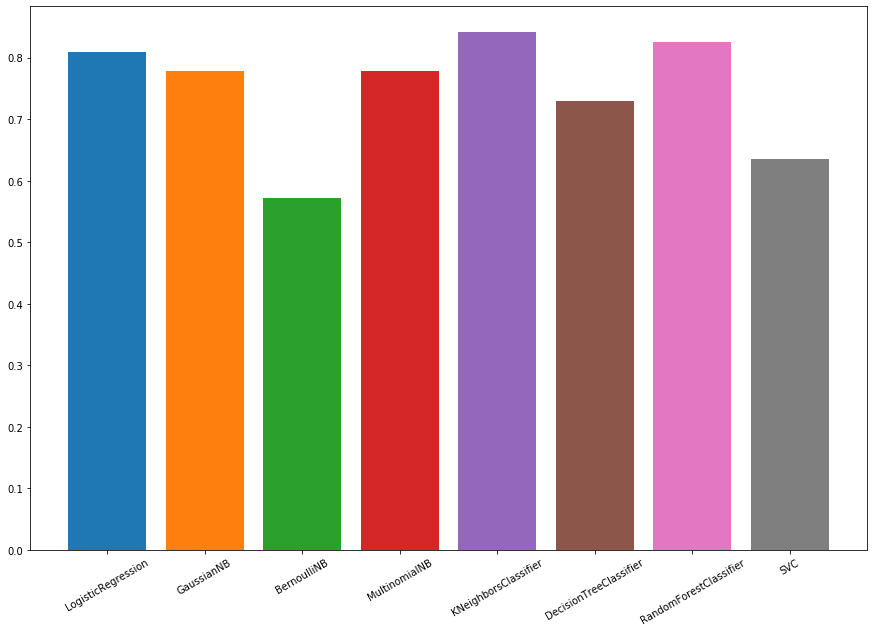

Model được chọn là KNeighborsClassifier do có accuracy score cao nhất = 84.13%.


In [13]:
models = [lr(solver='lbfgs',multi_class='auto'),
          gnb(),bnb(),mnb(),
          knn(),dt(),rf(n_estimators=10),SVC(gamma='auto')]
acc = 0
bestmod = ''
labels = []
plt.figure(figsize=(15,10))
for m in models:
    model = m.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    a = accuracy_score(y_test,y_pred)
    modname = m.__class__.__name__
    labels += [modname]
    plt.bar(modname,a)
    if a > acc:
        acc = a
        bestmod = modname
        clf = m
plt.xticks(rotation=30)
plt.show()
print('Model được chọn là {} do có accuracy score cao nhất = {:.2%}.'.format(bestmod,acc))

### 3. Đánh giá model dựa trên train/test.

In [14]:
clf.fit(X_train,y_train)
print('Train score = {:.2%}\nTest score = {:.2%}'.format(clf.score(X_train,y_train),clf.score(X_test,y_test)))

Train score = 80.69%
Test score = 84.13%


**Nhận xét:** Model không bị underfitting vì Train score và Test score chỉ chênh lệch ít.

### 5. Hãy cho biết với X_new (từng giá trị ứng với từng cột trong dataset) như sau thì mẫu nào là mine (M), mẫu nào là rock (R) ?

In [15]:
X_new = [[0.0123,0.0309,0.0169,0.0313,0.0358,0.0102,0.0182,0.0579,0.1122,0.0835,0.0548,0.0847,0.2026,0.2557,0.1870,0.2032,0.1463,0.2849,0.5824,0.7728,0.7852,0.8515,0.5312,0.3653,0.5973,0.8275,1.0000,0.8673,0.6301,0.4591,0.3940,0.2576,0.2817,0.2641,0.2757,0.2698,0.3994,0.4576,0.3940,0.2522,0.1782,0.1354,0.0516,0.0337,0.0894,0.0861,0.0872,0.0445,0.0134,0.0217,0.0188,0.0133,0.0265,0.0224,0.0074,0.0118,0.0026,0.0092,0.0009,0.0044], [0.0203,0.0121,0.0380,0.0128,0.0537,0.0874,0.1021,0.0852,0.1136,0.1747,0.2198,0.2721,0.2105,0.1727,0.2040,0.1786,0.1318,0.2260,0.2358,0.3107,0.3906,0.3631,0.4809,0.6531,0.7812,0.8395,0.9180,0.9769,0.8937,0.7022,0.6500,0.5069,0.3903,0.3009,0.1565,0.0985,0.2200,0.2243,0.2736,0.2152,0.2438,0.3154,0.2112,0.0991,0.0594,0.1940,0.1937,0.1082,0.0336,0.0177,0.0209,0.0134,0.0094,0.0047,0.0045,0.0042,0.0028,0.0036,0.0013,0.0016]]

In [16]:
y_new = clf.predict(X_new)
print(y_new)
print(types[y_new])

[0 1]
['R' 'M']


Với X_new đã cho, 2 mẫu lần lượt là Rock và Mine.